**Исследование объявлений о продаже квартир**
_____
**Описание исследования**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
_____
**Цель исследования**
    
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
_____
**Исходные данные**

   По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении
______

**Данное исследование разделим на несколько частей:**

[**Часть 1. Изучение общей информации**](#Откроем-файл-с-данными-и-изучим-общую-информацию)

[**Часть 2. Предобработка данных**](#Предобработка-данных)

[**Часть 3. Посчитаем и добавим в таблицу новые столбцы**](#Посчитаем-и-добавим-в-таблицу-новые-столбцы)

[**Часть 4. Исследовательский анализ данных**](#Исследовательский-анализ-данных)

[**Часть 5. Общий вывод**](#Общий-вывод)

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

## Откроем файл с данными и изучим общую информацию

**Загружаем данные из файла в датафрейм.**

In [642]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    df = pd.read_csv('real_estate_da1ta.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Выводим первые 5 строчек датафрейма**

In [645]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.400000,5,False,...,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,NaN
7,5,7915000,71.6,2019-04-18,2,2.70,24,40.658769,22,False,...,NaN,0.0,NaN,NaN,110544,3,4,2019,другой,12.0


**Выведим основную информацию о датафрейме**

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Строим общую гистограмму для всех числовых столбцов таблицы.**

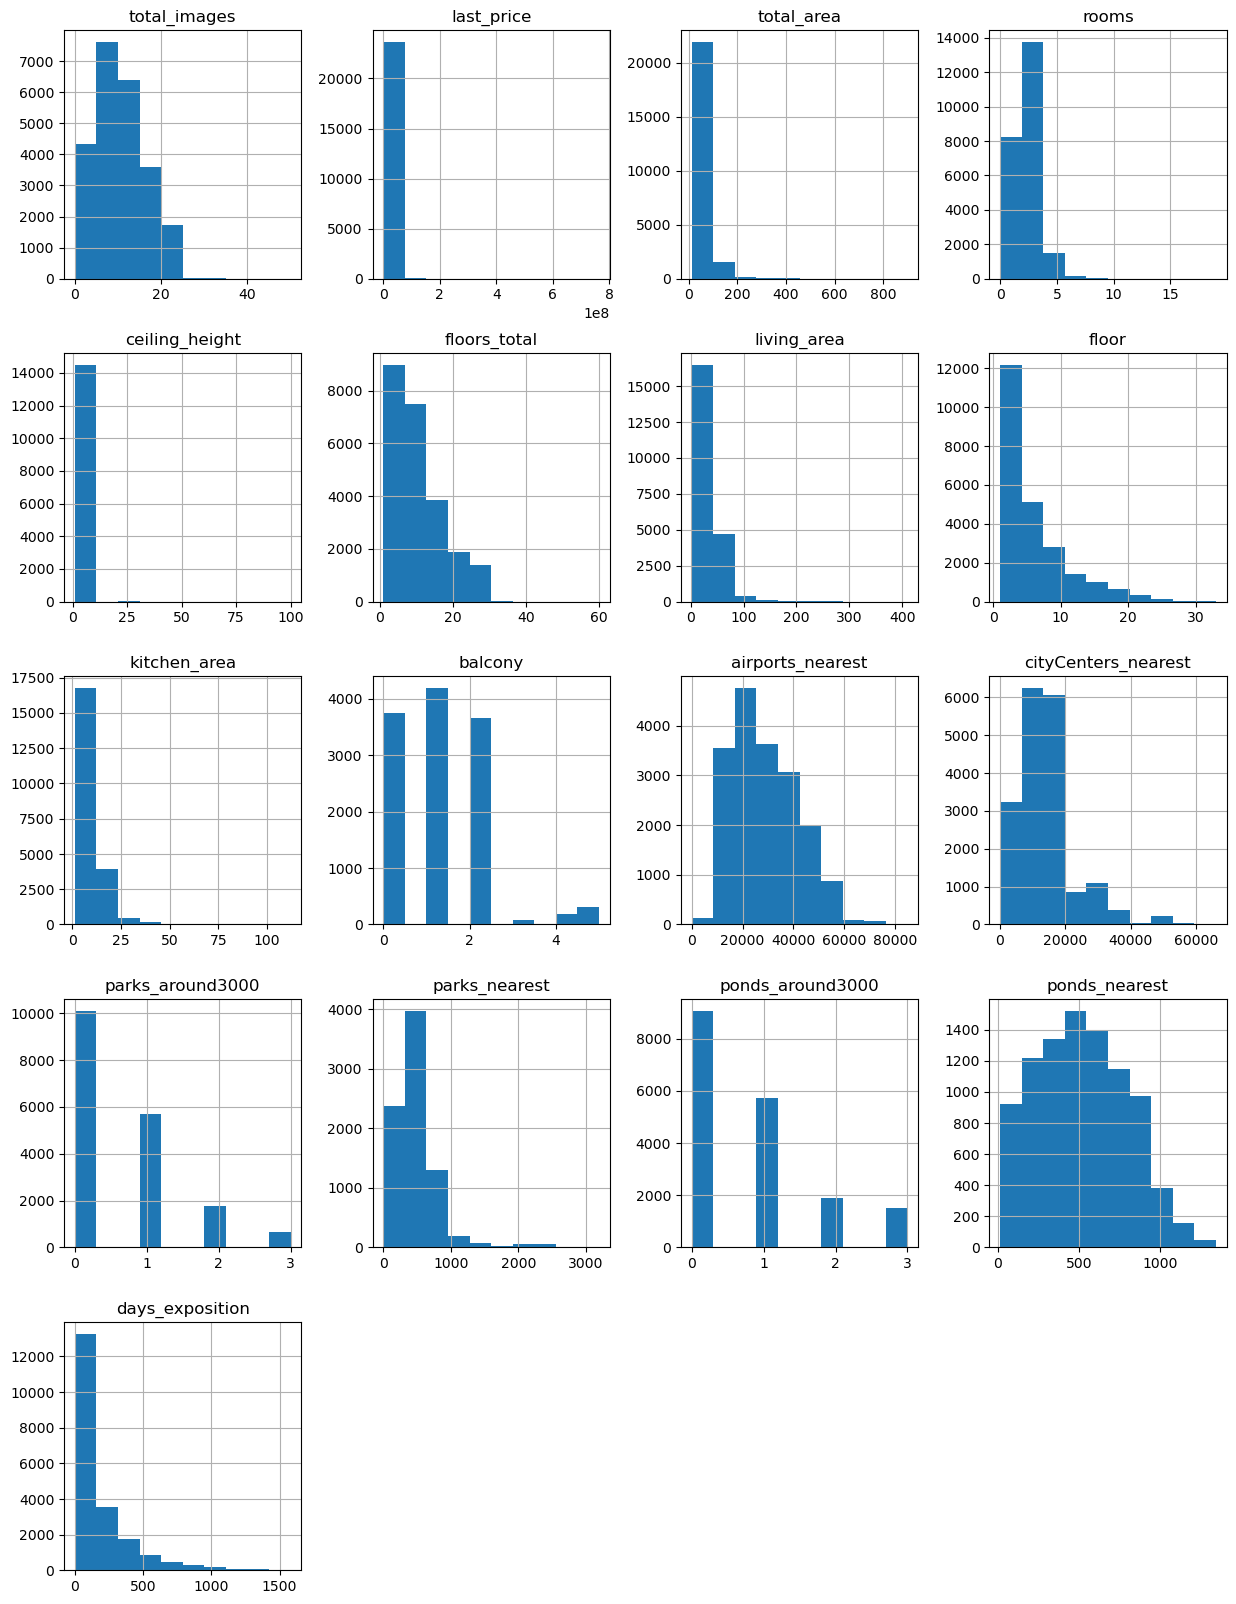

In [136]:
df.hist(figsize=(15, 20))
plt.show()

**Промежуточный вывод:**
По общей гистограмме неизменённых данных не видно тонких особенностей распределения значений, сильно влияние статистических выбросов, но можно получить общее представление о данных.

## Предобработка данных

### Найдём и изучим пропущенные значения в столбцах:

**Выведем количество пропущенных значений для каждого столбца.**

In [138]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заполним пропуски**

`ceiling_height`: Возможно, её не указали, потому что не было замера. Заполним медианным значением по локации. Всё заполнить не получится, так как в локации тоже есть пропуски.

In [140]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
for n in df['locality_name'].unique():
        df.loc[(df['locality_name'] == n) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
        df.loc[(df['locality_name'] == n), 'ceiling_height'].median()

In [142]:
print('Доля оставшихся пропусков: {0:.2%}'.format((df['ceiling_height'].isna().sum())/df.shape[0]))

Доля оставшихся пропусков: 0.66%


`floors_total`: Количество этажей так же не восстановить с точностью. 86 пропусков не повлияют на анализ. Могли образоваться из-за ошибок в заполнении.

`living_area`:  Могли образоваться из-за ошибок в заполнении / отсутствии информации. Заполним с помощью медианы отношения жилой к общей площади:

In [144]:
living_area_median = (df['living_area'] / df['total_area']).median()
df['living_area'] = df['living_area'].fillna(living_area_median * df['total_area'])

`kitchen_area`:  Могли образоваться из-за ошибок в заполнении / отсутствии информации или кухни. Заполним с помощью медианы отношения кухни к общей площади, кроме студий и открытых планов. 

In [146]:
kitchen_area_median = (df['kitchen_area'] / df['total_area']).median()

In [148]:

df.loc[(df['studio'] != True) & (df['open_plan'] != True) , 'kitchen_area'] = \
df['kitchen_area'].fillna(kitchen_area_median * df['total_area'])


In [150]:
print('Доля оставшихся пропусков: {0:.2%}'.format((df['kitchen_area'].isna().sum())/df.shape[0]))

Доля оставшихся пропусков: 0.91%


`is_apartment`: Пропуски вероятнее всего означают, что объект не явлется апартаментами: это воспринимается как вариант по умолчанию. Заменим пропуски на False.

In [164]:
df['is_apartment'] = df['is_apartment'].fillna(False)
pd.set_option('future.no_silent_downcasting', True)

In [154]:
df['is_apartment'].isna().sum()

0

`balcony`: Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [156]:
df['balcony'] = df['balcony'].fillna(0)

In [158]:
df['balcony'].isna().sum()

0

В следующих столбцах заполнить пропуски не представляется возможным: 

* `locality_name`
* `airports_nearest `
* `cityCenters_nearest `
* `parks_around3000 `
* `parks_nearest `
* `ponds_around3000 `
* `ponds_nearest`
* `days_exposition` Скорее всего пропуск означает, что объявление активно.

В некоторых из них количество пропусков подозрительно схожее, что намекает на технические причины возникновения пропусков.
При ответе на вопросы исследования можно взять только достоверно известные значения, а пропуски проигнорировать, если надежного способа их заполнить нет.

### Рассмотрим типы данных в каждом столбце:

Переведём `last_price` и `balcony` в целочисленный тип для удобства представления и операций.

In [160]:
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')

Переведём `first_day_exposition` в дату и время для корректного отображения:

In [433]:
df['first_day_exposition'] = pd.to_datetime(
df['first_day_exposition'], format='ISO8601')

Приведём `floors_total` в целочисленный тип, для чего потребуется удалить строки с пропусками.

In [434]:
df = df.dropna(subset=['floors_total'])

In [436]:
df['floors_total'] = df['floors_total'].astype('int')

Переведём `is_apartment` в логический тип на случай, если он понадобится для расчётов.

In [438]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты

In [440]:
df['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

In [442]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Уберём подстроки населённых пунктов.

In [444]:
name_to_remove = ['посёлок', 'поселок', 'городской посёлок', 'городской поселок',
                  'деревня ', 'поселок городского типа', 'посёлок городского типа', 
                 'садовое товарищество', 'село', 'городского типа', 'коттеджный', 
                 'городской', 'станции', 'садоводческое некоммерческое товарищество', 
                 'при железнодорожной']
for name in name_to_remove:
    df['locality_name'] = df['locality_name'].str.replace(name, '')

Уберём лишние пробелы в начале и конце строки.

In [446]:
df['locality_name'] = df['locality_name'].str.strip()

### Найдём и устраним редкие и выбивающиеся значения

In [448]:
rows_in = df.shape[0]
print('Начальное количество данных:', rows_in)

Начальное количество данных: 23613


Высота потолка:

In [450]:
df['ceiling_height'].describe()

count    23459.000000
mean         2.734208
std          1.014529
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Min и max значения явно аномальные. Рассмотрим их подробнее:

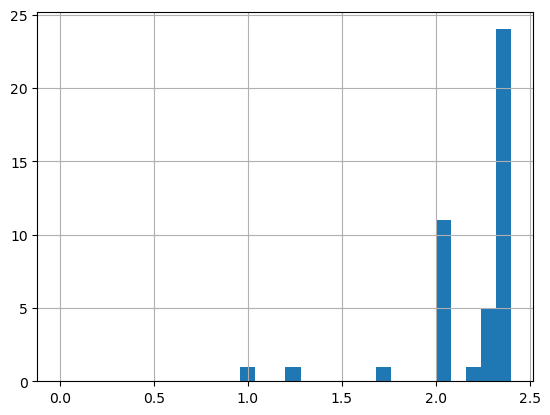

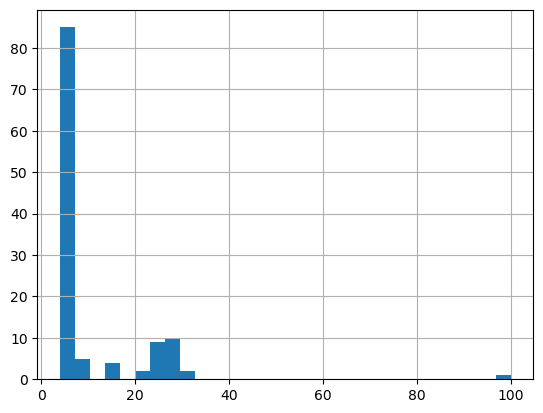

In [452]:
df['ceiling_height'].hist(bins=30, range=(0,2.4))
plt.show()
df['ceiling_height'].hist(bins=30, range=(4,100))
plt.show()

Логично предположить, что высоты более 20м на самом деле вещественные значения

In [454]:
df.loc[df['ceiling_height']>=20, 'ceiling_height']/=10

Исключим из анализа высоту менее 2м и более 5м:

In [456]:
df = df.query('2 < ceiling_height <= 5 or ceiling_height.isna()')

Диаграмма размаха для `last_price`:
В размах «усов» попадают нормальные
значения, а за пределами находятся выбросы, изображённые точками.
Выбросов значительное количество, поэтому будем удалять только выбивающиеся значения, чтобы не потерять все данные.

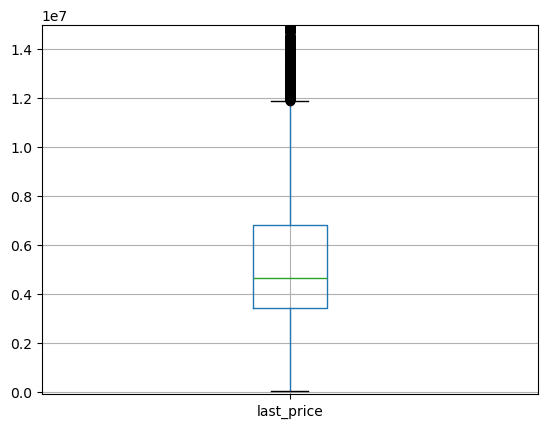

[array([3408000.,   12190.]), array([ 6799000., 11880000.])]

In [458]:
plt.ylim(-100000, 15000000)
_, bp = df.boxplot('last_price', return_type='both')
plt.show()
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
whiskers

In [460]:
print('Доля выбросов цены: {0:.2%}' \
      .format((len(df.query('10828140 < last_price or last_price < 12190')))/df.shape[0]))

Доля выбросов цены: 10.14%


In [462]:
df['last_price'].describe()

count    2.358100e+04
mean     6.525862e+06
std      1.082613e+07
min      1.219000e+04
25%      3.408000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [464]:
# удалим крайние перцентили:
lower_limit = df['last_price'].quantile(0.01)
upper_limit = df['last_price'].quantile(0.99)
df = df.query('@lower_limit < last_price < @upper_limit')

Общая площадь:

In [466]:
lower_limit = df['total_area'].quantile(0.01)
upper_limit = df['total_area'].quantile(0.99)
df = df.query('@lower_limit < total_area < @upper_limit')

Число комнат:

In [468]:
df['rooms'].describe()

count    22627.000000
mean         2.030936
std          0.963177
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

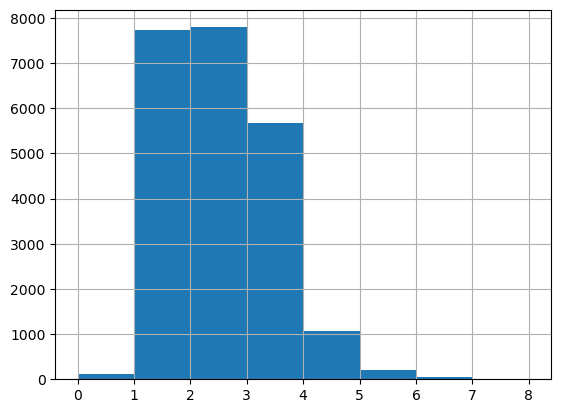

In [470]:
df['rooms'].hist(bins=8, range=(0,8))
plt.show()

Уберём выдающиеся значения более 7:

In [472]:
df = df.query('rooms <= 7')

Этажей в доме:

In [474]:
df['floors_total'].describe()

count    22626.000000
mean        10.773181
std          6.593913
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

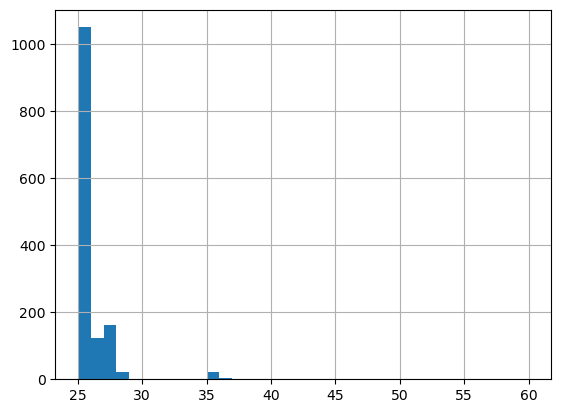

In [476]:
df['floors_total'].hist(bins=35, range=(25,60))
plt.show()

Уберём выдающиеся значения более 30

In [478]:
df = df.query('floors_total < 30')

Жилая площадь:

In [480]:
lower_limit = df['living_area'].quantile(0.01)
upper_limit = df['living_area'].quantile(0.99)
df = df.query('@lower_limit < living_area < @upper_limit')

Площадь кухни:

In [482]:
lower_limit = df['kitchen_area'].quantile(0.01)
upper_limit = df['kitchen_area'].quantile(0.99)
df = df.query('@lower_limit < kitchen_area < @upper_limit or kitchen_area.isna()')

Расстояние до ближайшего аэропорта:

In [484]:
lower_limit = df['airports_nearest'].quantile(0.01)
upper_limit = df['airports_nearest'].quantile(0.99)
df = df.query('@lower_limit < airports_nearest < @upper_limit or airports_nearest.isna()')

Расстояние до центра города:

In [486]:
lower_limit = df['cityCenters_nearest'].quantile(0.01)
upper_limit = df['cityCenters_nearest'].quantile(0.99)
df = df.query('@lower_limit < cityCenters_nearest < @upper_limit or cityCenters_nearest.isna()')

Расстояние до ближайшего парка:

In [488]:
lower_limit = df['parks_nearest'].quantile(0.01)
upper_limit = df['parks_nearest'].quantile(0.99)
df = df.query('@lower_limit < parks_nearest < @upper_limit or parks_nearest.isna()')

Расстояние до ближайшего водоёма:

In [490]:
lower_limit = df['ponds_nearest'].quantile(0.01)
upper_limit = df['ponds_nearest'].quantile(0.99)
df = df.query('@lower_limit < ponds_nearest < @upper_limit or ponds_nearest.isna()')

Сколько дней было размещено объявление (от публикации до снятия):

In [492]:
lower_limit = df['days_exposition'].quantile(0.01)
upper_limit = df['days_exposition'].quantile(0.99)
df = df.query('@lower_limit < days_exposition < @upper_limit or days_exposition.isna()')

Проверим, сколько данных осталось после обработки всех редких значений:

In [494]:
print('Доля от изначального количества данных после фильтрации всех столбцов: {0:.2%}'.format(df.shape[0] / rows_in))

Доля от изначального количества данных после фильтрации всех столбцов: 84.46%


**Промежуточный вывод:**
На этапе предобработки данных:
1. Нашли и изучили пропущенные значения в столбцах:
* Определили, в каких столбцах есть пропуски: высота потолков, кол-во этажей в доме, жилая площадь, апартаменты, площадь кухни, кол-во балконов, населённого пункта, расстояние до аэропорта, расстояние до центра города, расстояние до парка, расстояние до водоёма, парки в пределах 3 км, водоёмы в пределах 3 км, дней с момента размещения объявления;
* Заполнили пропущенные значения там, где это возможно: высота потолков, жилая площадь, апартаменты, площадь кухни, кол-во балконов;
* Указали причины, которые могли привести к пропускам в данных.
2. Преобразовали тип данных в столбцах: цена, кол-во балконов, кол-во этажей в доме в целочисленный; даты развещения объявления в формат даты и времени.
3. Изучили уникальные значения в столбце с названиями населённых пунктов и устранили неявные дубликаты.
4. Нашли и устранили редкие и выбивающиеся значения, а в столбце "высота потолка" восстановили корректное значение.

## Посчитаем и добавим в таблицу новые столбцы

Цена одного квадратного метра:

In [496]:
df['square_meter'] = (df['last_price'] / df['total_area']).astype('int')

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [498]:
df['weekday'] = df['first_day_exposition'].dt.weekday

Месяц публикации объявления:

In [500]:
df['month'] = df['first_day_exposition'].dt.month

Год публикации объявления:

In [502]:
df['year'] = df['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»):

In [504]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [506]:
df['floor_type'] = df.apply(categorize_floor, axis=1)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений):

In [508]:
try:
    df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000, 0)
    df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
except:
    pass

**Промежуточный вывод:**
Добавили в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (перевели из м в км и округлили до целых значений).

Проверяем изменения:

In [510]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.400000,5,False,...,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,NaN
7,5,7915000,71.6,2019-04-18,2,2.70,24,40.658769,22,False,...,NaN,0.0,NaN,NaN,110544,3,4,2019,другой,12.0


## Исследовательский анализ данных

### Изучим следующие параметры объектов:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров. Опишем все ваши наблюдения по параметрам в ячейке с типом markdown.

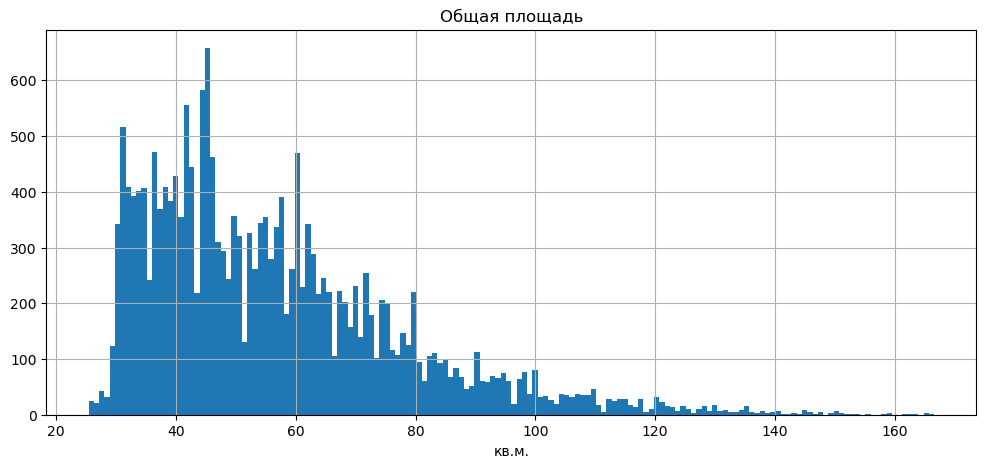

In [512]:
df['total_area'].hist(bins=160, figsize=(12,5))
plt.title('Общая площадь')
plt.xlabel('кв.м.')
plt.show()

Чаще всего встречается общая площадь около 45 кв. м. Большая часть значений лежит в пределах 30-60 кв.м.

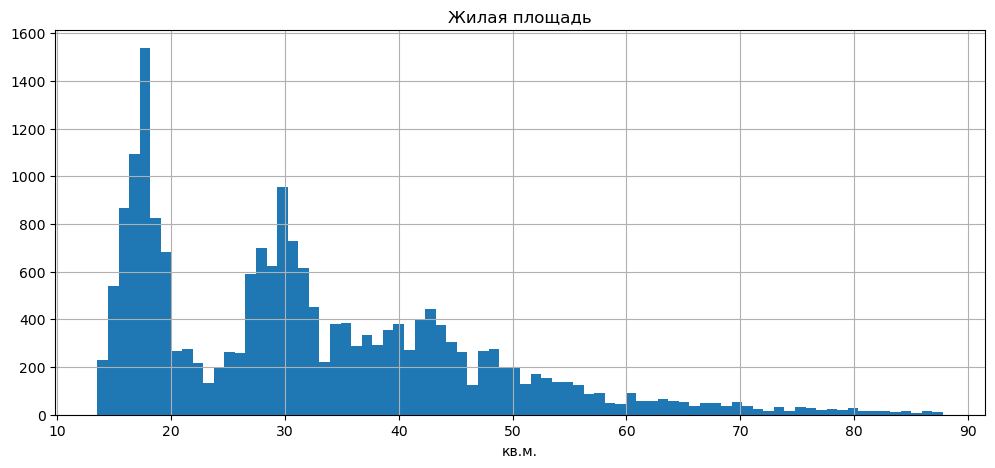

In [514]:
df['living_area'].hist(bins=80, figsize=(12,5))
plt.title('Жилая площадь')
plt.xlabel('кв.м.')
plt.show()

Самые частые значения жилой площади - 18 и 30 кв. м. Очевидно, эти пики означают квартиры с 1 и 2 комнатами. 

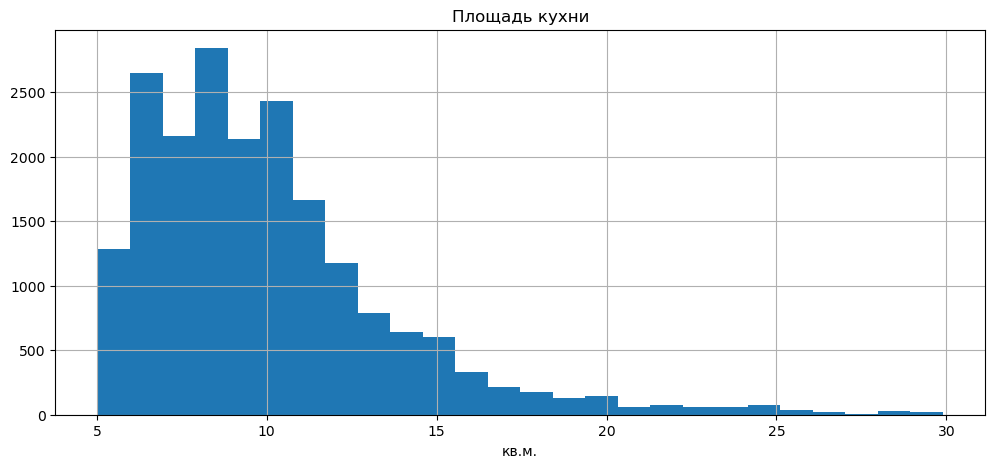

In [516]:
df['kitchen_area'].hist(bins=26, figsize=(12,5))
plt.title('Площадь кухни')
plt.xlabel('кв.м.')
plt.show()

Чаще всего встречается площадь кухни в 8 кв. м. 

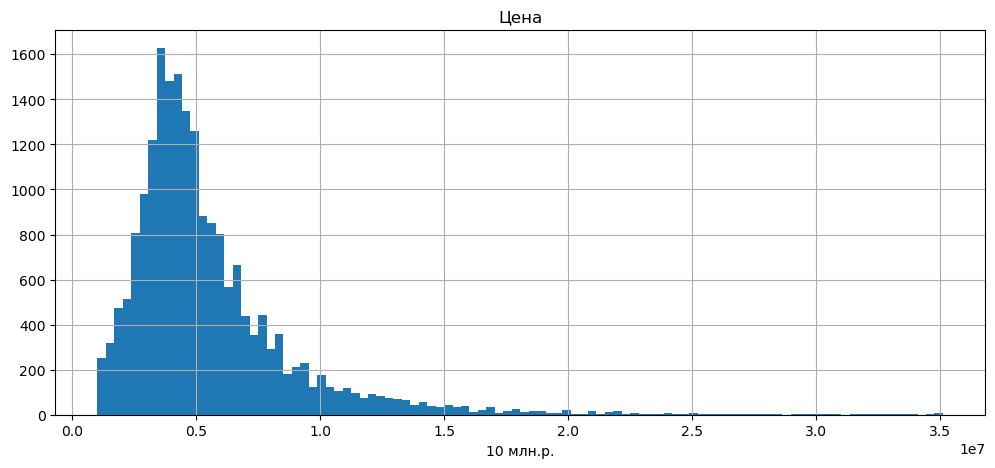

In [518]:
df['last_price'].hist(bins=100, figsize=(12,5))
plt.title('Цена')
plt.xlabel('10 млн.р.')
plt.show()

Наиболее часто встречается цена около 4 000 000 р. Большинство значений лежит в диапазоне 2.5 - 6 млн. р.

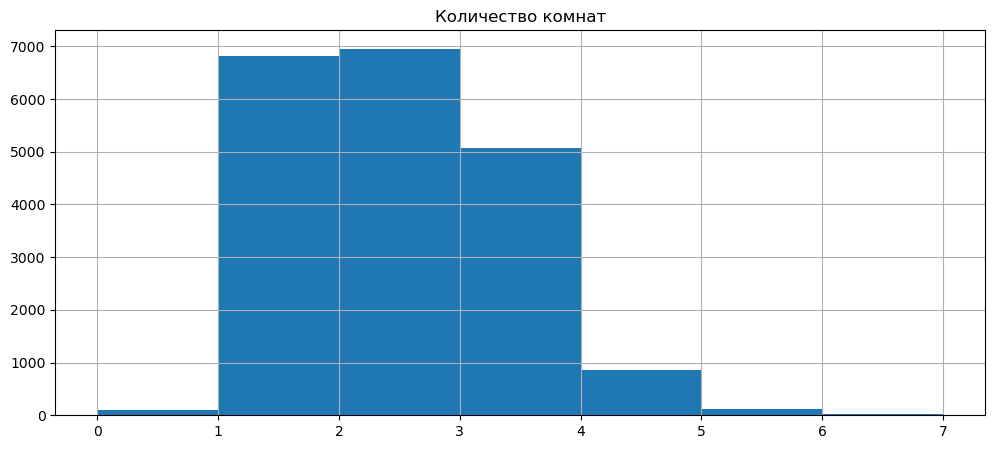

In [520]:
df['rooms'].hist(bins=7, figsize=(12,5))
plt.title('Количество комнат')
plt.show()

В наборе данных квартиры с 1 и 2 комнатами попадаются с примерно одинаковой частотой и составляют большинство объявлений.

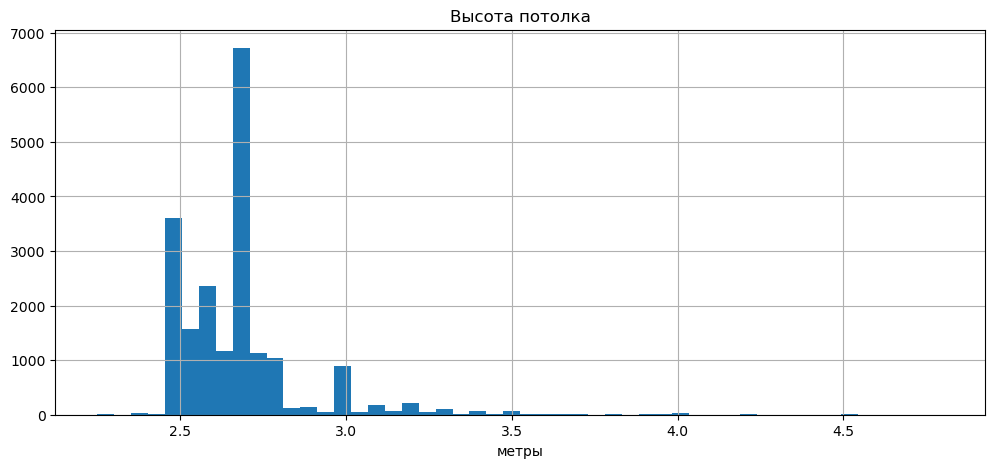

In [522]:
df['ceiling_height'].hist(bins=50, figsize=(12,5))
plt.title('Высота потолка')
plt.xlabel('метры')
plt.show()

Наиболее частая высота потолка - 2.7 м.

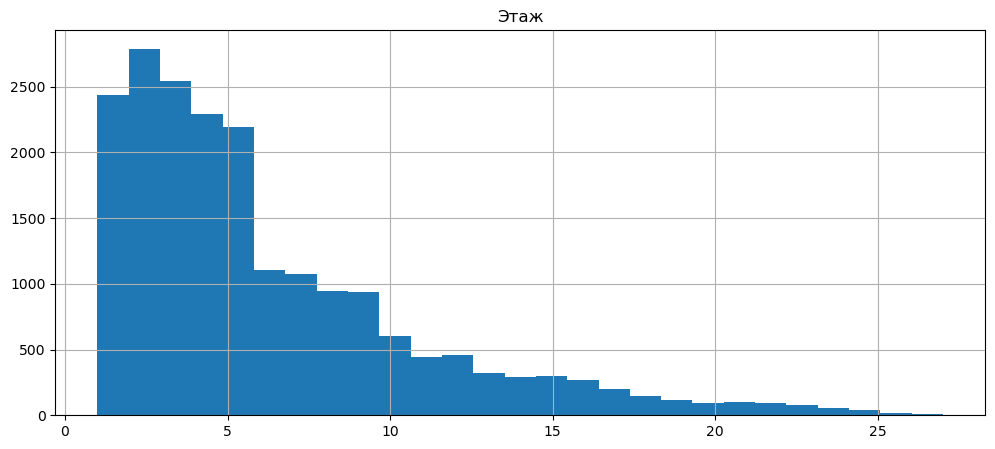

In [524]:
df['floor'].hist(bins=27, figsize=(12,5))
plt.title('Этаж')
plt.show()

Чаще других продают квартиры на этаже c 1 по 5.

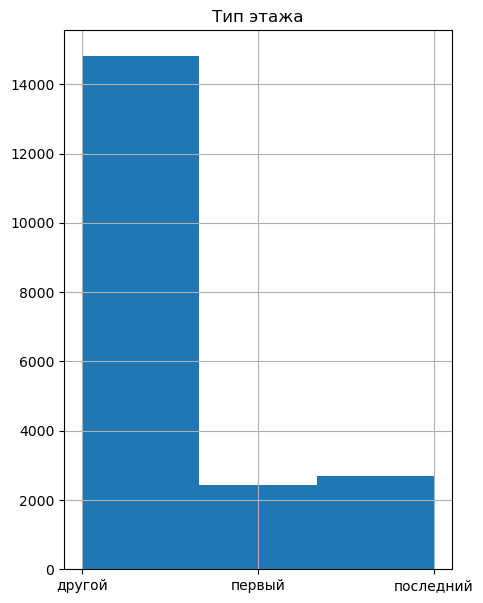

In [526]:
df['floor_type'].hist(bins=3, figsize=(5,7))
plt.title('Тип этажа')
plt.show()

На первом и последнем этажах продают четверть квартир.

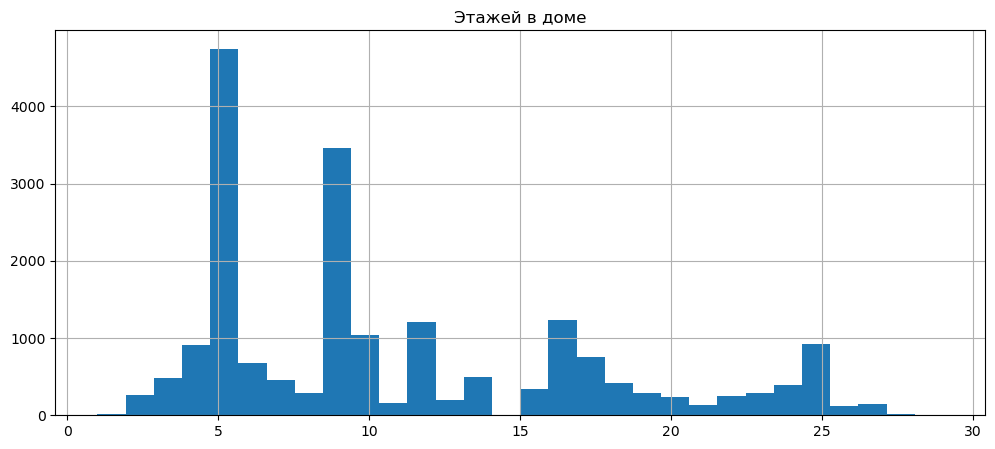

In [528]:
df['floors_total'].hist(bins=30, figsize=(12,5))
plt.title('Этажей в доме')
plt.show()

Чаще других продают квартиры в пятиэтажках.

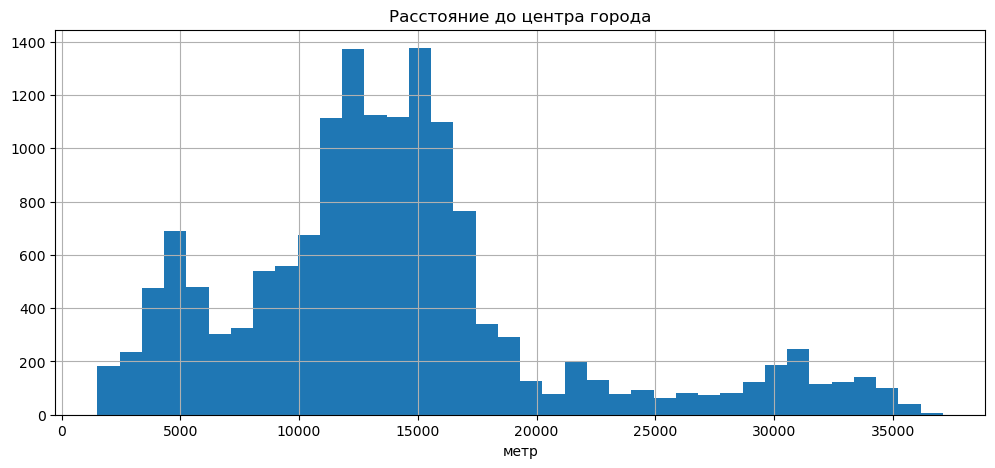

In [530]:
df['cityCenters_nearest'].hist(bins=38, figsize=(12,5))
plt.title('Расстояние до центра города')
plt.xlabel('метр')
plt.show()

12 км и 15 км - самое распостранённое растояние до центра города в данной выборке.

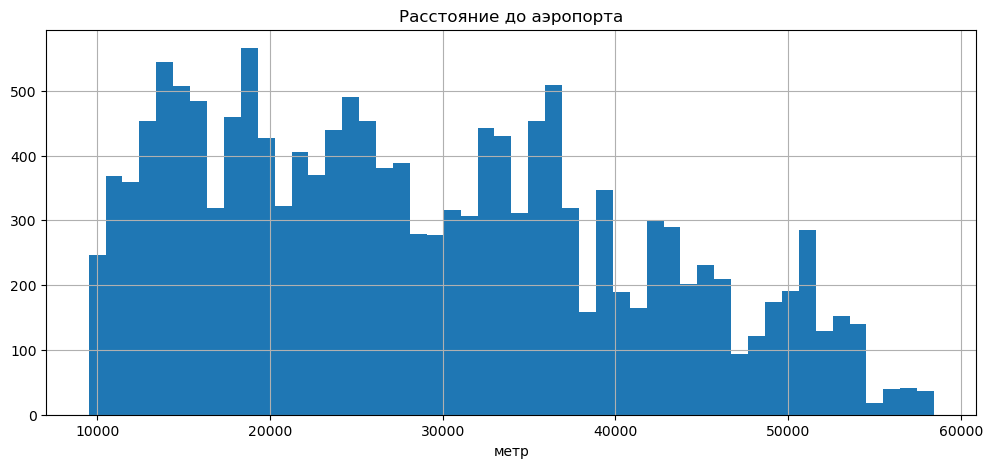

In [532]:
df['airports_nearest'].hist(bins=50, figsize=(12,5))
plt.title('Расстояние до аэропорта')
plt.xlabel('метр')
plt.show()

Растояние от квартиры до аэропорта расположено довольно равномерно в пределах 10-37 км.

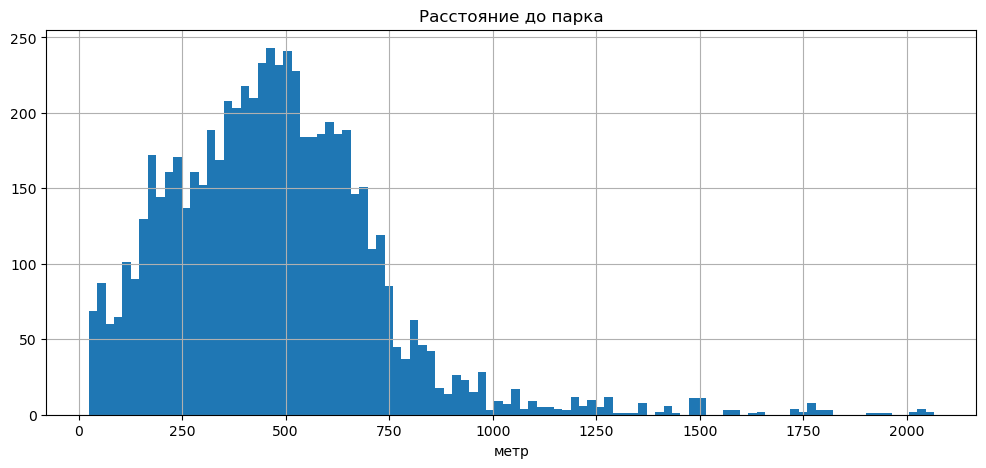

In [534]:
df['parks_nearest'].hist(bins=100, figsize=(12,5))
plt.title('Расстояние до парка')
plt.xlabel('метр')
plt.show()

Чаще всего парк находится в 500 м.

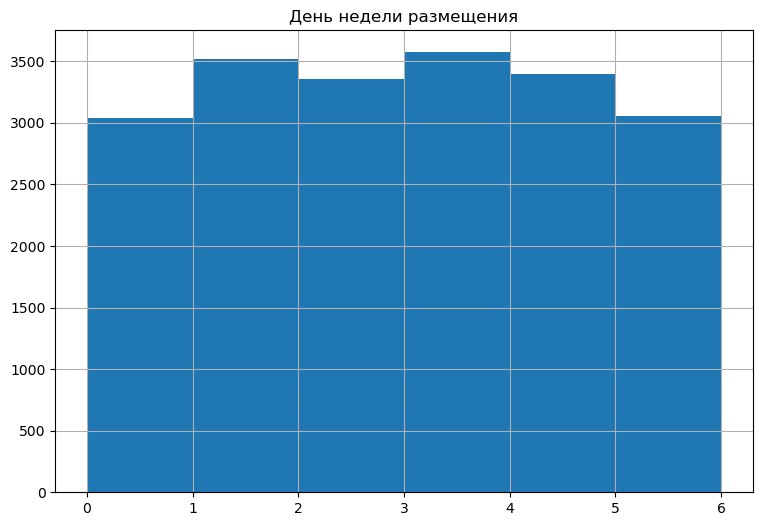

In [536]:
df['weekday'].hist(bins=6, figsize=(9,6))
plt.title('День недели размещения')
plt.show()

Объявления размещают одинаково часто в любой день недели.

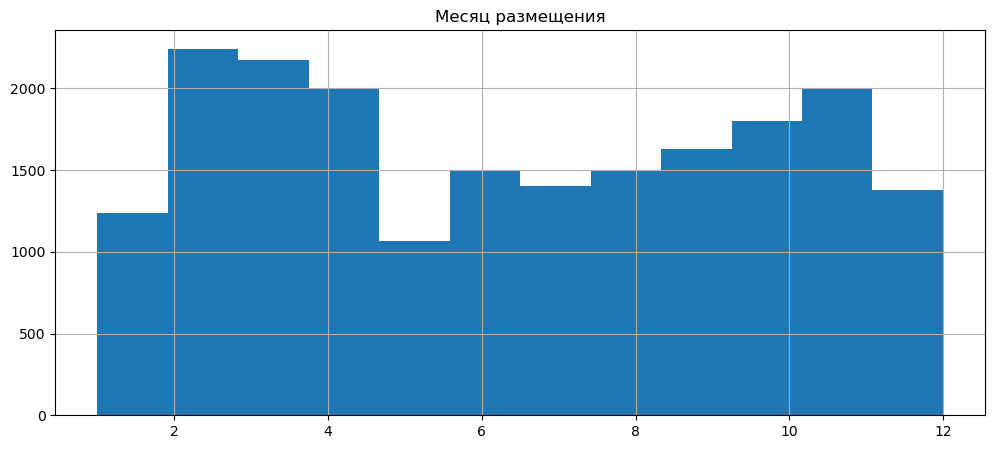

In [538]:
df['month'].hist(bins=12, figsize=(12,5))
plt.title('Месяц размещения')
plt.show()

В январе и мае размещают меньше всего объявлений

### Изучим, как быстро продавались квартиры.

Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
Построим гистограмму.
Посчитаем среднее и медиану.
В ячейке типа markdown опишим, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

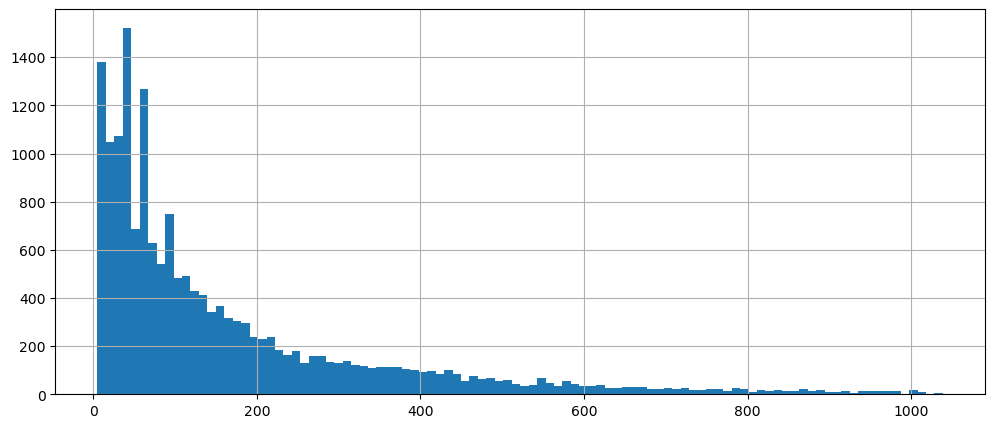

In [540]:
df['days_exposition'].hist(bins=100, figsize=(12,5))
plt.show()

In [542]:
df['days_exposition'].describe()

count    17301.000000
mean       167.653257
std        187.511873
min          5.000000
25%         45.000000
50%         94.000000
75%        219.000000
max       1039.000000
Name: days_exposition, dtype: float64

Минимальное значение 5 дней. 25% объявлений были закрыты за 45 дней. Вероятно, сюда входят такие причины, как закрытие объявления для редактирования, продажа на дргих сервисах и т.д.

(-50.0, 600.0)

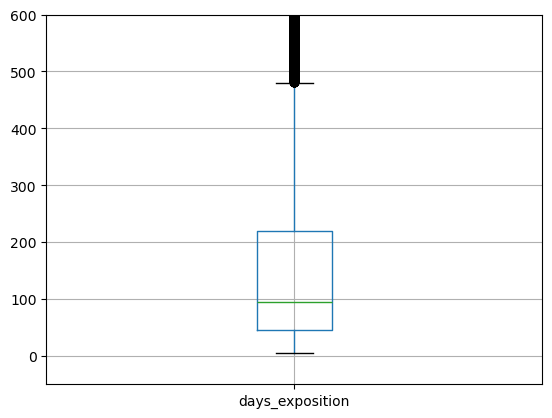

In [544]:
df.boxplot('days_exposition')
plt.ylim(-50, 600)

Продажа квартиры обычно занимает 95 дней (медиана). Среднее здесь 180 дней, на что сильно повлияли выбросы - более 475 дней. Быстрой можно назвать продажу до 45 дней, так как первая четверь продаж случилась в этот срок; долгой - более 219, так как последняя четверь продаж случилась после.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

 Изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
  
Построем графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можем использовать сводные таблицы.

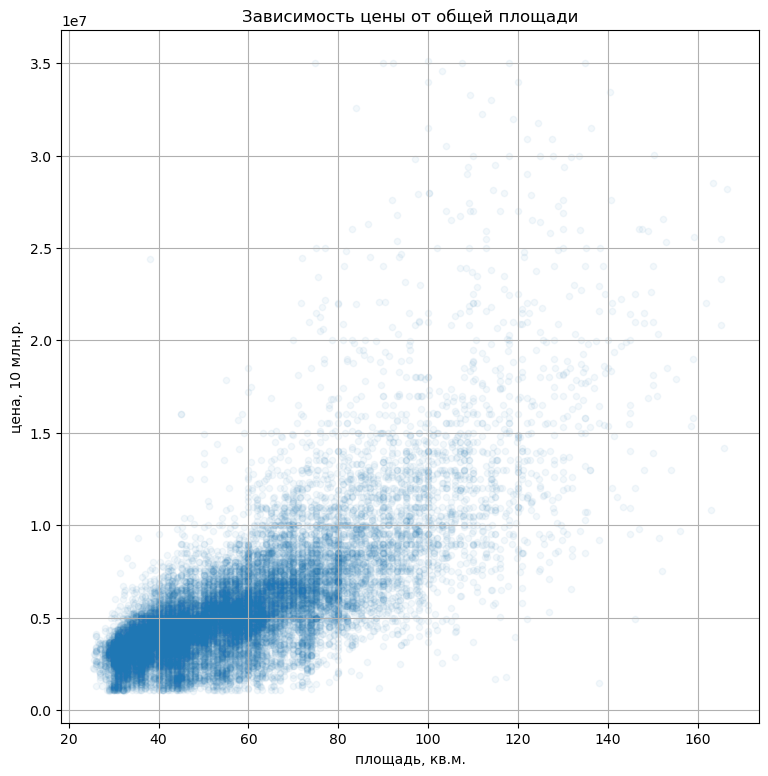

In [546]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(9,9), alpha=0.05, grid=True)
plt.title('Зависимость цены от общей площади')
plt.xlabel('площадь, кв.м.')
plt.ylabel('цена, 10 млн.р.')
plt.show()

Корреляция цены и общей площади положительная. Цена увеличивается не пропорционально площади в данной широкой выборке.

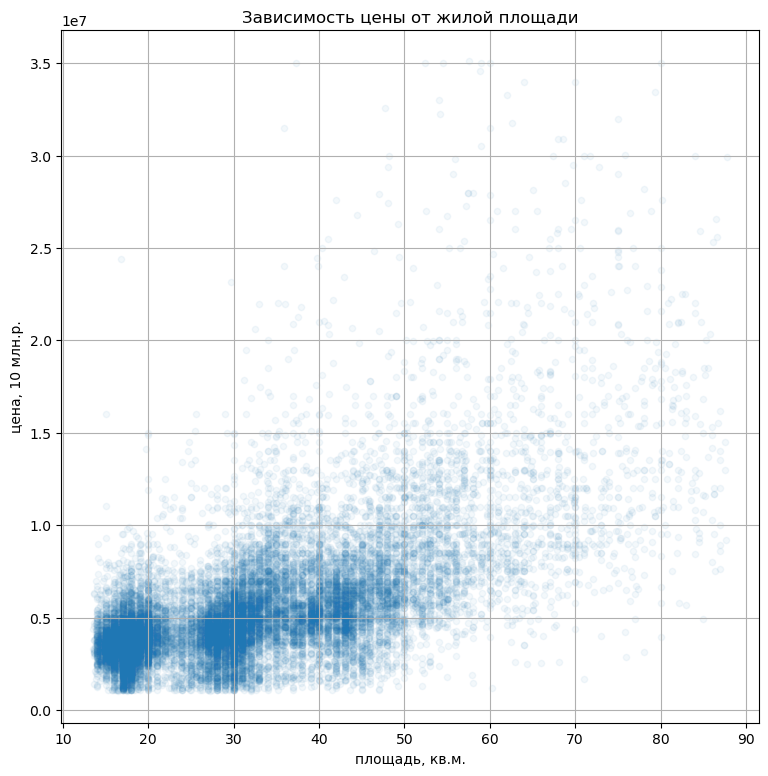

In [548]:
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(9,9), alpha=0.05, grid=True)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('площадь, кв.м.')
plt.ylabel('цена, 10 млн.р.')
plt.show()

Корреляция цены и жилой площади положительная. По мере увеличения жилой площади, цена увеличивается довольно слабо. Видим отчетливые пятна, где скучковались значения по квартирам с 1 и 2 комнатами.

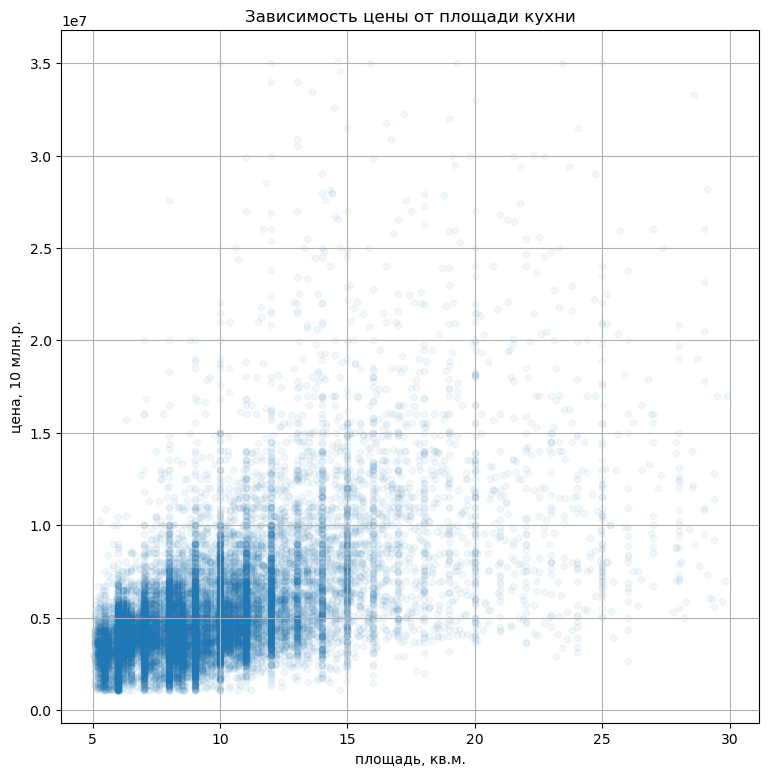

In [550]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(9,9), alpha=0.05, grid=True)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь, кв.м.')
plt.ylabel('цена, 10 млн.р.')
plt.show()

Корреляция цены и площади кухни положительная. Также не прямо пропорциональная. Заметны вертикальные столбики, так как много целых значений в малом диапазоне.

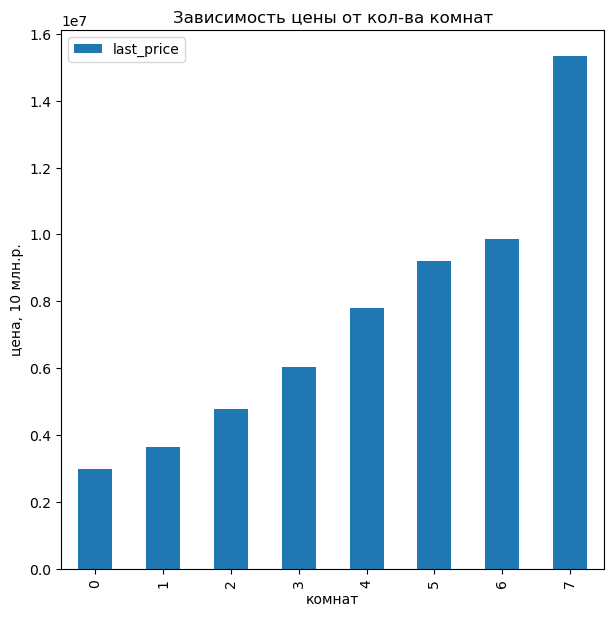

In [552]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median') \
.plot(kind='bar', figsize=(7,7))
plt.title('Зависимость цены от кол-ва комнат')
plt.xlabel('комнат')
plt.ylabel('цена, 10 млн.р.')
plt.show()

Больше комнат - больше цена.

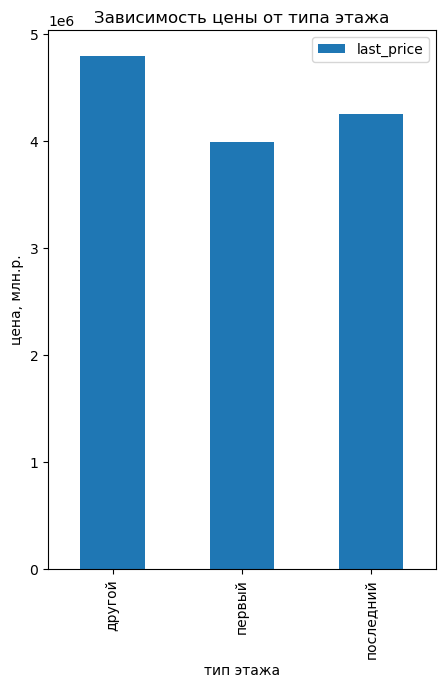

In [554]:
df.pivot_table(index='floor_type', values='last_price', aggfunc='median') \
.plot(kind='bar', figsize=(5,7))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('тип этажа')
plt.ylabel('цена, млн.р.')
plt.show()

Последний этаж ценится меньше другого, а первый - ещё меньше. Отмечу, что скорее всего, низкую цену на квартиры на первом и последнем этажах можно аргументировать плохими условиями - шум от улиц и моторов лифта, охлаждаемость помещения зимой.

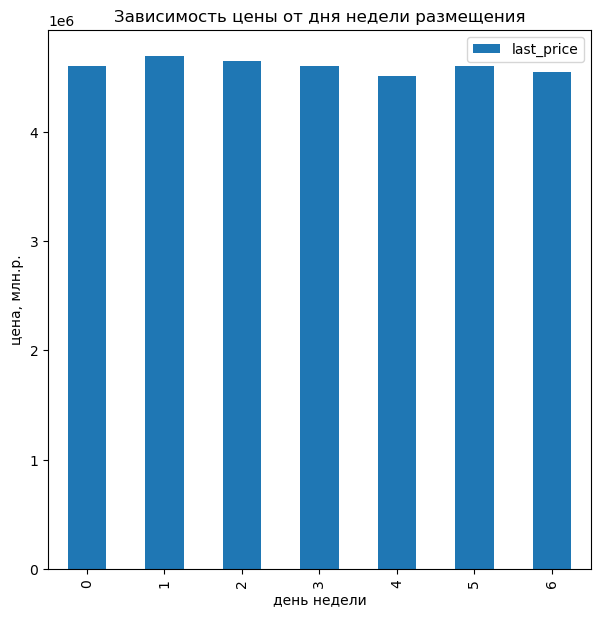

In [556]:
df.pivot_table(index='weekday', values='last_price', aggfunc='median') \
.plot(kind='bar', figsize=(7,7))
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('день недели')
plt.ylabel('цена, млн.р.')
plt.show()

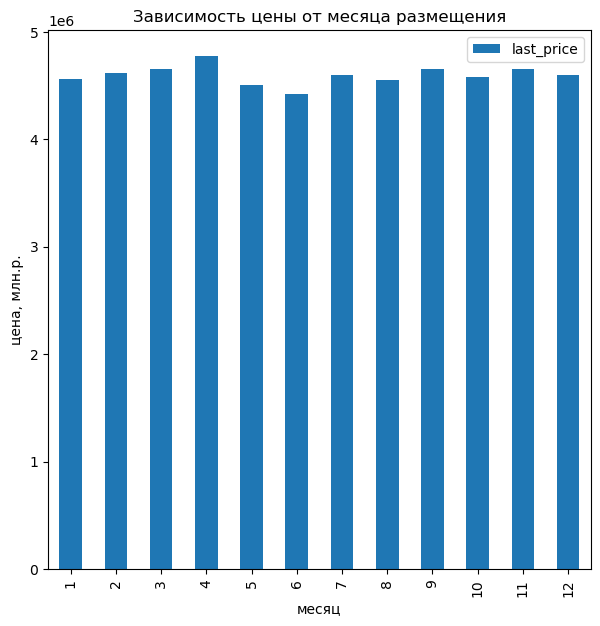

In [558]:
df.pivot_table(index='month', values='last_price', aggfunc='median') \
.plot(kind='bar', figsize=(7,7))
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('месяц')
plt.ylabel('цена, млн.р.')
plt.show()

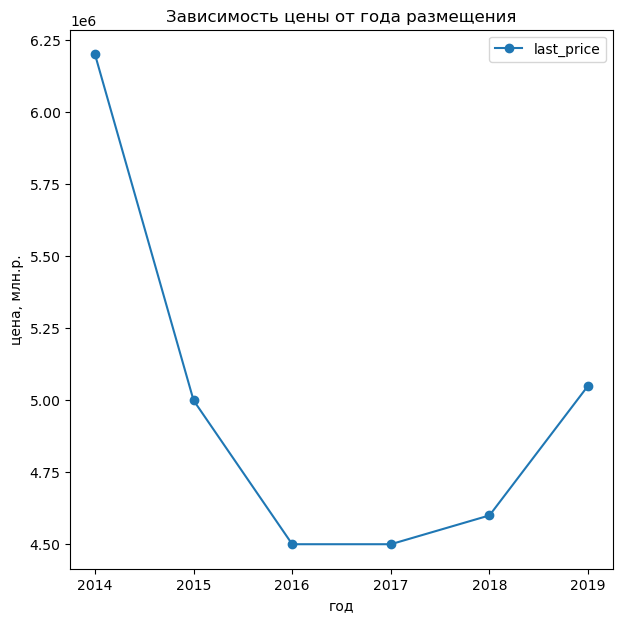

In [560]:
df.pivot_table(index='year', values='last_price', aggfunc='median') \
.plot(style='o-', figsize=(7,7))
plt.title('Зависимость цены от года размещения')
plt.xlabel('год')
plt.ylabel('цена, млн.р.')
plt.show()

Зависимость цены от дня недели в пределах стат. погрешности. От месяца чуть больше, но ещё малозначительна. Зависимость от года заметна.

Можно также посмотреть на динамику изменения площади продаваемых квартир по годам. Возможно, упала не столько цена, сколько площадь продаваемых квартир?

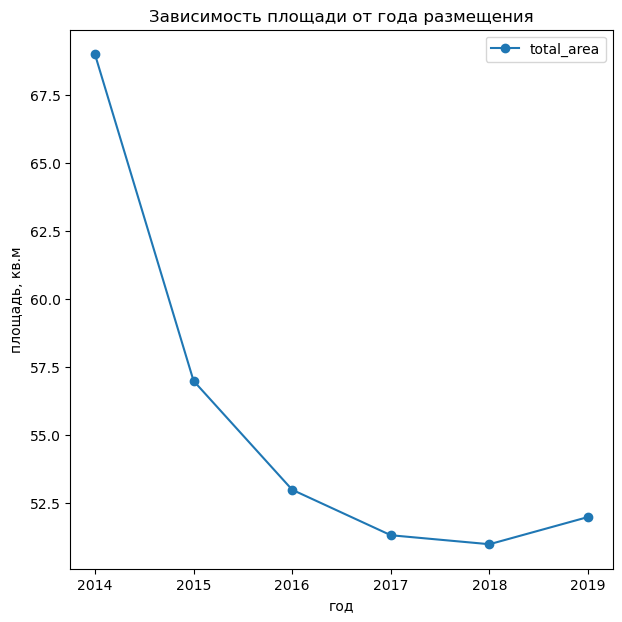

In [562]:
df.pivot_table(index='year', values='total_area', aggfunc='median') \
.plot(style='o-', figsize=(7,7))
plt.title('Зависимость площади от года размещения')
plt.xlabel('год')
plt.ylabel('площадь, кв.м')
plt.show()

В данном случае на зависимость цены от года в значительной степени повляло падение площади продаваемых квартир, можно предположить, что стали чаще проводиться сделки с объектами меньшей площади, ввиду их более высокой ликвидности

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [564]:
big_10 = df['locality_name'].value_counts().head(10)
avg_price_per_area = df.query('locality_name in @big_10.index').pivot_table(index='locality_name', values='square_meter')
avg_price_per_area = avg_price_per_area.sort_values(by='square_meter', ascending=False)
avg_price_per_area.columns = ['Цена кв. метра, руб.']
display(avg_price_per_area.style.format({'Цена кв. метра, руб.':"{:.0f}"}).background_gradient(cmap='Blues', axis=0))

,"Цена кв. метра, руб."
locality_name,
Санкт-Петербург,109301
Пушкин,102951
Кудрово,94464
Парголово,92340
Мурино,84882
Шушары,77797
Колпино,74947
Гатчина,69428
Всеволожск,68816


### Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

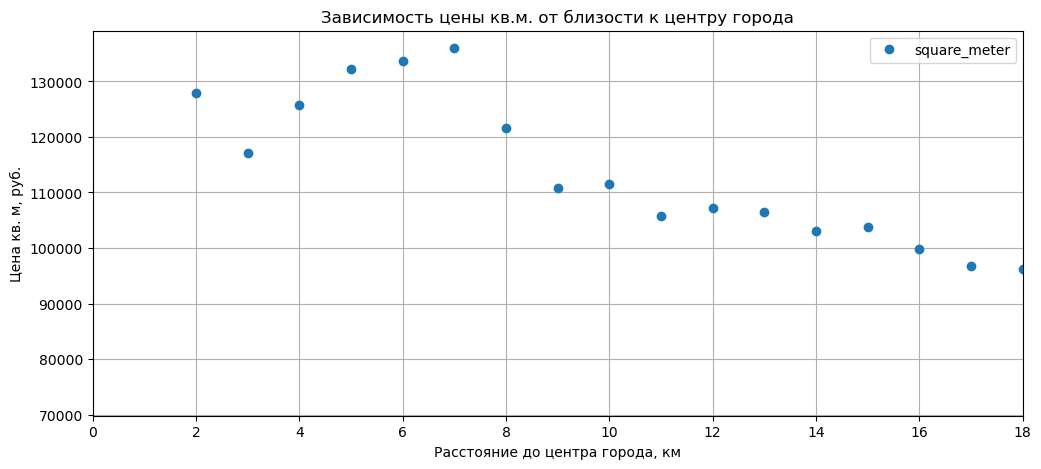

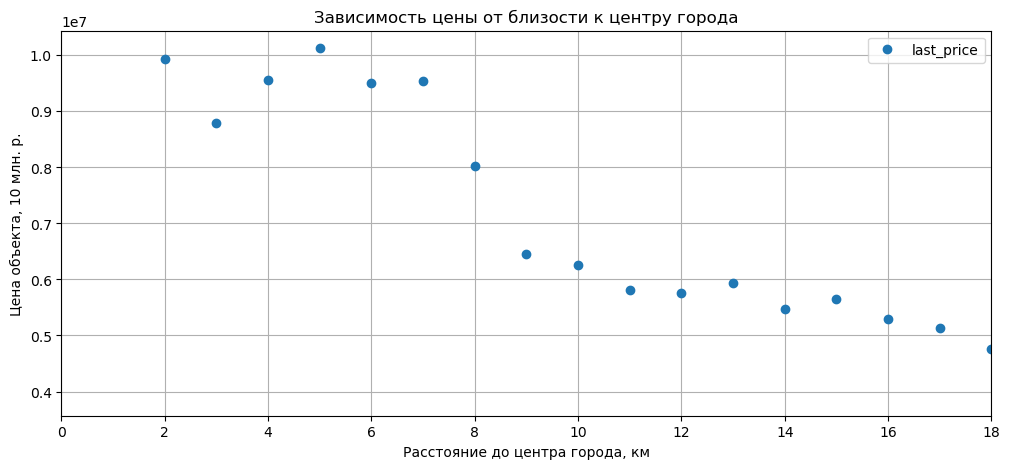

In [565]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
avg_price_per_area = df_spb.pivot_table(index='cityCenters_nearest_km', values='square_meter')
avg_last_price = df_spb.pivot_table(index='cityCenters_nearest_km', values='last_price')
avg_price_per_area.plot(style='o', grid=True, figsize=(12,5))
plt.title('Зависимость цены кв.м. от близости к центру города')
plt.xlabel('Расстояние до центра города, км')
# Расстояние до центра Санкт-Петербурга более 18км - другой населённый пункт по любым метрикам
plt.xlim(0,18)
plt.ylabel('Цена кв. м, руб.')
plt.show()
avg_last_price.plot(style='o', grid=True, figsize=(12,5))
plt.title('Зависимость цены от близости к центру города')
plt.xlabel('Расстояние до центра города, км')
plt.xlim(0,18)
plt.ylabel('Цена объекта, 10 млн. р.')
plt.show()

Как и ожидалось, чем дальше квартира находится от центра, тем дешевле она стоит. Корреляция отрицательная. При этом на графике цены за кв. м. самые дорогие оказались квартиры в 5-7 км от центра. На графике зависимости общей цены от близости до центра города заметно резкое падение цены с 9 км от центра.

**Промежуточный вывод:**

Провели исследовательский анализ данных:
1. Описали наблюдения по следующим параметрам:
* общая площадь: чаще всего встречается общая площадь около 45 кв. м. Большая часть значений лежит в пределах 30-60 кв.м;
* жилая площадь: самые частые значения жилой площади - 18 и 30 кв. м. Очевидно, эти пики означают квартиры с 1 и 2 комнатами;
* площадь кухни: чаще всего встречается площадь кухни в 8 кв. м;
* цена объекта: наиболее часто встречается цена около 4 000 000 р. Большинство значений лежит в диапазоне 2.5 - 6 млн. р;
* количество комнат: в наборе данных квартиры с 1 и 2 комнатами попадаются с примерно одинаковой частотой и составляют большинство объявлений;
* высота потолков: наиболее частая высота потолка - 2.7 м;
* этаж квартиры: чаще других продают квартиры на этаже c 1 по 5;
* тип этажа квартиры («первый», «последний», «другой»): на первом и последнем этажах продают четверть квартир;
* общее количество этажей в доме: Чаще других продают квартиры в пятиэтажках;
* расстояние до центра города в метрах: 12 км и 15 км - самое распостранённое растояние до центра города в данной выборке;
* расстояние до ближайшего аэропорта: растояние от квартиры до аэропорта расположено довольно равномерно в пределах 10-37 км;
* расстояние до ближайшего парка: чаще всего парк находится в 500 м;
* день и месяц публикации объявления: объявления размещают одинаково часто в любой день недели. В январе и мае на гистограмме видны провалы.
2. Изучили, как быстро продавались квартиры.
* Посчитали среднее и медиану: 168 и 94 дня соответсвенно;
* Описали, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими: Продажа квартиры обычно занимает 95 дней (медиана). Быстрой можно назвать продажу до 45 дней, так как первая четверь продаж случилась в этот срок; долгой - более 219, так как последняя четверь продаж случилась после.
3. Изучили, зависит ли цена от:
* общей площади, жилой площади, площади кухни, количества комнат: зависимость положительная;
* этажа: последний этаж ценится меньше другого, а первый - ещё меньше;
* даты размещения (день недели, месяц, год): Зависимость цены от дня недели в пределах стат. погрешности. От месяца чуть больше, но ещё малозначительна. Зависимость от года заметна, что объясняется падением площади продаваемых квартир.

4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: Самая высокая в Санкт-Петербурге - 109 т.р, а сама низкая в Выборге - 58 т.р.
5. Вычислили среднюю цену каждого километра удаления от центра Санкт-Петербурга.

## Общий вывод

Были получены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Выполнена предобработка и изучение данных, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Проведён исследовательский анализ данных:**
1. Построили гистограммы и описали наблюдения по многим параметрам.
2. Продажа квартиры обычно занимает 95 дней (медиана). Быстрой можно назвать продажу до 45 дней, долгой - более 219 дней.
3. Построили графики, которые показали зависимость цены от:
    * общей площади, жилой площади, площади кухни, количества комнат (положительная);
    * этажа: последний этаж ценится меньше другого, а первый - ещё меньше;
    * даты размещения (день недели, месяц, год). Зависимость от года заметна, что объясняется падением площади продаваемых квартир.
4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: Самая высокая в Санкт-Петербурге - 109 т.р, а сама низкая в Выборге - 58 т.р.
5. Вычислили среднюю цену каждого километра удаления от центра Санкт-Петербурга. На графике после 7 км заметно, что цена меняется. Это возможный центр города.